In [1]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow-gpu==2.8.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install protobuf==3.20

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import re
import os
import urllib.request
from tqdm import tqdm
from transformers import BertTokenizer, TFBertForSequenceClassification

In [7]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv", filename="finance_data.csv")

In [8]:
data = pd.read_csv('GPT4_training_data.csv')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5100


In [9]:
data

,labels,name,theme,동영상 제목,댓글,댓글 작성일,PRO
0,0,검은사막,무소속,[검은사막] 뉴비/초보자를 위한 장비 강화 가이드 (검은사막 투발라를 졸업하셨다면 ...,형님 솔직히 새해에는 마이크하나 삽시다 좋은걸로,2023-01-20T09:16:10Z,형님 솔직히 새해에는 마이크하나 삽시다 좋은걸로
1,0,메이플,사운드,무자본도 가능! 메이플 크리티컬 데미지 30% 증가 필수! 【메이플스토리 크리티컬 ...,뭐지 눈은.메이플을 보고있는데귀는 바람의나라 노래를 듣고있는거 같음,2021-01-27T18:08:58Z,뭐지 눈은 메이플을 보고있는데 귀는 바람의나라 노래를 듣고있는거 같음
2,0,배틀그라운드,BM,떱배 환불해달라 한 분들 다 들어와 보이소.. l 배그홈쇼핑,단점:두발이 없는사람은 못쏩니다,2021-08-05T08:53:39Z,단점 두발이 없는사람은 못쏩니다
3,0,검은사막,사운드,검은사막 샤이 연주회 - 21곡 풀버전 [음악감상],요새 영상 왜 안올라와욧!!,2023-03-04T18:32:27Z,요새 영상 왜 안올라와욧
4,0,메이플,그래픽,쿨감 ⌛6초⌛ 모자 가져왔습니다!!!! 17초마다 극딜박는 미친캐릭이 된 부캐불독;...,쿨쿨쿨 저격 8초뚝 가즈아~,2023-01-15T20:50:33Z,쿨쿨쿨 저격 8초뚝 가즈아
...,...,...,...,...,...,...,...
5095,2,제2의나라,그래픽,"[제2의 나라] 거구의 전사, '디스트로이어' 등장!",0:04 왜 여성 혐오발언 하죠?,2021-06-22T05:38:20Z,왜 여성 혐오발언 하죠
5096,2,메이플,BM,"「리부트 직업추천」 주보돌이는 뭘 키우는게 좋나요? [메이플스토리, 페이지]",은월은 주보돌이로는 별로인가요? 하버 260 메린이 기준입니다유니온 3800이구,2023-06-28T17:17:38Z,은월은 주보돌이로는 별로인가요 하버 260 메린이 기준입니다 유니온 3800이구
5097,2,검은사막,그래픽,[검은사막] 다크나이트 커스터마이징 영상,how to downlond for free ?,2016-12-17T07:28:07Z,how to downlond for free
5098,2,배틀그라운드,운영,"패치노트#6.3 요점정리 - 판처파우스트, M249 / Tommy Gun 총기 밸런...",이거 그냥 팀킬 자체를 끄면 안돼나요? 총이든 수류탄이든 화염병이든 그냥 팀데미지를...,2020-09-20T11:29:04Z,이거 그냥 팀킬 자체를 끄면 안돼나요 총이든 수류탄이든 화염병이든 그냥 팀데미지를...


In [10]:
# data['labels'] = data['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])
# data[:5]

In [11]:
# '동영상 제목', '댓글 작성일', '댓글' 컬럼 삭제
data = data.drop(['name', 'theme', '동영상 제목', '댓글 작성일', '댓글'], axis=1)

In [12]:
data[:5]

,labels,PRO
0,0,형님 솔직히 새해에는 마이크하나 삽시다 좋은걸로
1,0,뭐지 눈은 메이플을 보고있는데 귀는 바람의나라 노래를 듣고있는거 같음
2,0,단점 두발이 없는사람은 못쏩니다
3,0,요새 영상 왜 안올라와욧
4,0,쿨쿨쿨 저격 8초뚝 가즈아


In [13]:
# 'PRO' 칼럼을 'kor_sentence'로 변경
data.rename(columns={'PRO': 'kor_sentence'}, inplace=True)
data

,labels,kor_sentence
0,0,형님 솔직히 새해에는 마이크하나 삽시다 좋은걸로
1,0,뭐지 눈은 메이플을 보고있는데 귀는 바람의나라 노래를 듣고있는거 같음
2,0,단점 두발이 없는사람은 못쏩니다
3,0,요새 영상 왜 안올라와욧
4,0,쿨쿨쿨 저격 8초뚝 가즈아
...,...,...
5095,2,왜 여성 혐오발언 하죠
5096,2,은월은 주보돌이로는 별로인가요 하버 260 메린이 기준입니다 유니온 3800이구
5097,2,how to downlond for free
5098,2,이거 그냥 팀킬 자체를 끄면 안돼나요 총이든 수류탄이든 화염병이든 그냥 팀데미지를...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   labels        5100 non-null   int64 
 1   kor_sentence  5100 non-null   object
dtypes: int64(1), object(1)
memory usage: 79.8+ KB


In [15]:
data['labels'].describe()

count    5100.000000
mean        1.000000
std         0.816577
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: labels, dtype: float64

In [16]:
data['labels'].value_counts()

0    1700
1    1700
2    1700
Name: labels, dtype: int64

In [17]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [18]:
print('kor_sentence 열의 유니크한 값 :',data['kor_sentence'].nunique())

kor_sentence 열의 유니크한 값 : 5100


In [19]:
duplicate = data[data.duplicated()]

In [20]:
duplicate

,labels,kor_sentence


In [21]:
# 중복 제거
data.drop_duplicates(subset=['kor_sentence'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5100


<Axes: >

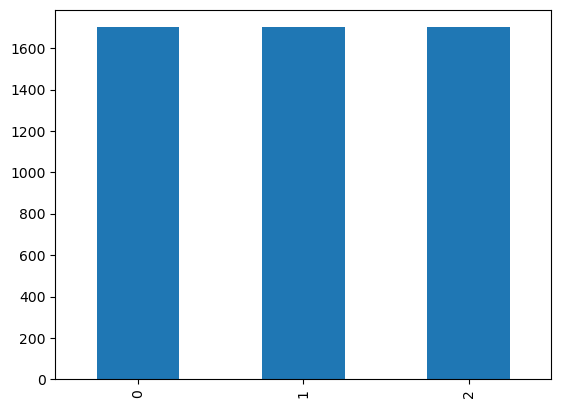

In [22]:
data['labels'].value_counts().plot(kind='bar')

In [23]:
print('레이블의 분포')
print(data.groupby('labels').size().reset_index(name='count'))

레이블의 분포
   labels  count
0       0   1700
1       1   1700
2       2   1700


In [24]:
print(f'중립의 비율 = {round(data["labels"].value_counts()[0]/len(data) * 100,3)}%')
print(f'긍정의 비율 = {round(data["labels"].value_counts()[1]/len(data) * 100,3)}%')
print(f'부정의 비율 = {round(data["labels"].value_counts()[2]/len(data) * 100,3)}%')

중립의 비율 = 33.333%
긍정의 비율 = 33.333%
부정의 비율 = 33.333%


In [25]:
data

,labels,kor_sentence
0,0,형님 솔직히 새해에는 마이크하나 삽시다 좋은걸로
1,0,뭐지 눈은 메이플을 보고있는데 귀는 바람의나라 노래를 듣고있는거 같음
2,0,단점 두발이 없는사람은 못쏩니다
3,0,요새 영상 왜 안올라와욧
4,0,쿨쿨쿨 저격 8초뚝 가즈아
...,...,...
5095,2,왜 여성 혐오발언 하죠
5096,2,은월은 주보돌이로는 별로인가요 하버 260 메린이 기준입니다 유니온 3800이구
5097,2,how to downlond for free
5098,2,이거 그냥 팀킬 자체를 끄면 안돼나요 총이든 수류탄이든 화염병이든 그냥 팀데미지를...


In [26]:
X_data = data['kor_sentence']
y_data = data['labels']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 5100
레이블의 개수: 5100


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [28]:
print('훈련 샘플의 개수 :', len(X_train))
print('테스트 샘플의 개수 :', len(X_test))

훈련 샘플의 개수 : 4080
테스트 샘플의 개수 : 1020


In [29]:
print('--------훈련 데이터의 비율-----------')
print(f'중립 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'부정 = {round(y_train.value_counts()[2]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
중립 = 33.333%
긍정 = 33.333%
부정 = 33.333%


In [30]:
print('--------테스트 데이터의 비율-----------')
print(f'중립 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
print(f'부정 = {round(y_test.value_counts()[2]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
중립 = 33.333%
긍정 = 33.333%
부정 = 33.333%


In [28]:
max_seq_len = 128

In [29]:
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

In [30]:
def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):

    input_ids, attention_masks, token_type_ids, data_labels = [], [], [], []

    for example, label in tqdm(zip(examples, labels), total=len(examples)):
        # input_id는 워드 임베딩을 위한 문장의 정수 인코딩
        input_id = tokenizer.encode(example, max_length=max_seq_len, pad_to_max_length=True)

        # attention_mask는 실제 단어가 위치하면 1, 패딩의 위치에는 0인 시퀀스.
        padding_count = input_id.count(tokenizer.pad_token_id)
        attention_mask = [1] * (max_seq_len - padding_count) + [0] * padding_count

        # token_type_id은 세그먼트 인코딩
        token_type_id = [0] * max_seq_len

        assert len(input_id) == max_seq_len, "Error with input length {} vs {}".format(len(input_id), max_seq_len)
        assert len(attention_mask) == max_seq_len, "Error with attention mask length {} vs {}".format(len(attention_mask), max_seq_len)
        assert len(token_type_id) == max_seq_len, "Error with token type length {} vs {}".format(len(token_type_id), max_seq_len)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        data_labels.append(label)

    input_ids = np.array(input_ids, dtype=int)
    attention_masks = np.array(attention_masks, dtype=int)
    token_type_ids = np.array(token_type_ids, dtype=int)

    data_labels = np.asarray(data_labels, dtype=np.int32)

    return (input_ids, attention_masks, token_type_ids), data_labels

In [31]:
# train_X, train_y = convert_examples_to_features(X_train, y_train, max_seq_len=max_seq_len, tokenizer=tokenizer)

# 학습 데이터 변환
train_X, train_y = convert_examples_to_features(X_train, y_train, max_seq_len=max_seq_len, tokenizer=tokenizer)

  0%|          | 0/3861 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ubuntu/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 3861/3861 [00:01<00:00, 3320.5

In [32]:
# test_X, test_y = convert_examples_to_features(X_test, y_test, max_seq_len=max_seq_len, tokenizer=tokenizer)

# 검증 데이터 변환
val_X, val_y = convert_examples_to_features(X_test, y_test, max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 966/966 [00:00<00:00, 3363.73it/s]


In [33]:
input_id = train_X[0][0]
attention_mask = train_X[1][0]
token_type_id = train_X[2][0]
label = train_y[0]

print('단어에 대한 정수 인코딩 :',input_id)
print('어텐션 마스크 :',attention_mask)
print('세그먼트 인코딩 :',token_type_id)
print('각 인코딩의 길이 :', len(input_id))
print('정수 인코딩 복원 :',tokenizer.decode(input_id))
print('레이블 :',label)

단어에 대한 정수 인코딩 : [    2  4048  2063  2259 10735  2147  2227  2079  8660 27135 10735  2147
  4401  4286  2205  2259  4946  2052  4169  2085   575  6233  4045 19521
  1513  2062    18     3     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
어텐션 마스크 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [34]:
# TPU를 사용할 수 있는지 확인합니다
if 'COLAB_TPU_ADDR' in os.environ:
    # TPU가 사용 가능한 경우 TPU를 설정합니다
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)

    strategy = tf.distribute.experimental.TPUStrategy(resolver)
    print('TPU를 사용합니다.')
else:
    # TPU가 사용 불가능한 경우 CUDA GPU를 사용합니다
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) == 0:
        raise RuntimeError("GPU를 찾을 수 없습니다. TensorFlow가 올바르게 설치되어 있는지 확인하세요.")

    # 모든 GPU 메모리를 필요에 따라 동적으로 할당하도록 설정합니다
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

    # CUDA GPU를 사용하는 경우 문자열 "/gpu:0"을 전달합니다
    strategy = tf.distribute.OneDeviceStrategy("/gpu:0")
    print('CUDA GPU를 사용합니다.')

CUDA GPU를 사용합니다.


2023-11-11 15:07:08.230685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 15:07:08.234403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 15:07:08.236335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 15:07:08.238991: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [1]:
# 모델 학습
with strategy.scope():
    model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=3, from_pt=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

NameError: name 'strategy' is not defined

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [39]:
# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=30,
    restore_best_weights=True
)

# ModelCheckpoint 설정
checkpoint_path = "best_model_gpt(1).h5"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 모델 학습
model.fit(
    train_X, train_y, epochs=200, batch_size=32,
    validation_data=(val_X, val_y),
    callbacks=[early_stopping, model_checkpoint]
)

# 평가 데이터 변환
test_X, test_y = convert_examples_to_features(X_test, y_test, max_seq_len=max_seq_len, tokenizer=tokenizer)

Epoch 1/200


2023-11-11 15:07:38.900194: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_7939"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\021FlatMapDataset:21"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUC

AttributeError: in user code:

    File "/home/ubuntu/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/ubuntu/anaconda3/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1411, in compute_loss  *
        return super().compute_loss(*args, **kwargs)
    File "/home/ubuntu/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 918, in compute_loss  **
        return self.compiled_loss(
    File "/home/ubuntu/anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 199, in __call__
        y_t, y_p, sw = match_dtype_and_rank(y_t, y_p, sw)
    File "/home/ubuntu/anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 684, in match_dtype_and_rank
        if ((y_t.dtype.is_floating and y_p.dtype.is_floating) or

    AttributeError: 'NoneType' object has no attribute 'dtype'


In [ ]:
# 모델 평가
model.evaluate(test_X, test_y, batch_size=32)

In [ ]:
# 날아감
# 1/1 [==============================] - 7s 7s/step - loss: 0.8152 - accuracy: 0.8499
# [0.8152273893356323, 0.8498964905738831]

In [ ]:
# best_model_gpt(1).h5
# 1/1 [==============================] - 7s 7s/step - loss: 0.8832 - accuracy: 0.8375
# [0.8832384943962097, 0.8374741077423096]

In [ ]:
# best_model_gpt(01)(2).h5
# 1/1 [==============================] - 7s 7s/step - loss: 1.2762 - accuracy: 0.8385
# [1.2761708498001099, 0.8385093212127686]

In [ ]:
# best_model_gpt(01)(3).h5
# 1/1 [==============================] - 7s 7s/step - loss: 1.3445 - accuracy: 0.8375
# [1.344465970993042, 0.8374741077423096]